In [ ]:
Entrada capas ocultas 4 capas que son 64, 32,16, learnign train de 0,3 y 10 epocas

In [8]:
#importar librerias 

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [9]:
# Carga y divide los datos automáticamente
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Verificación de las dimensiones
print(f"Entrenamiento: {xtrain.shape}, Etiquetas: {ytrain.shape}")
print(f"Pruebas: {xtest.shape}, Etiquetas: {ytest.shape}")


Entrenamiento: (60000, 28, 28), Etiquetas: (60000,)
Pruebas: (10000, 28, 28), Etiquetas: (10000,)


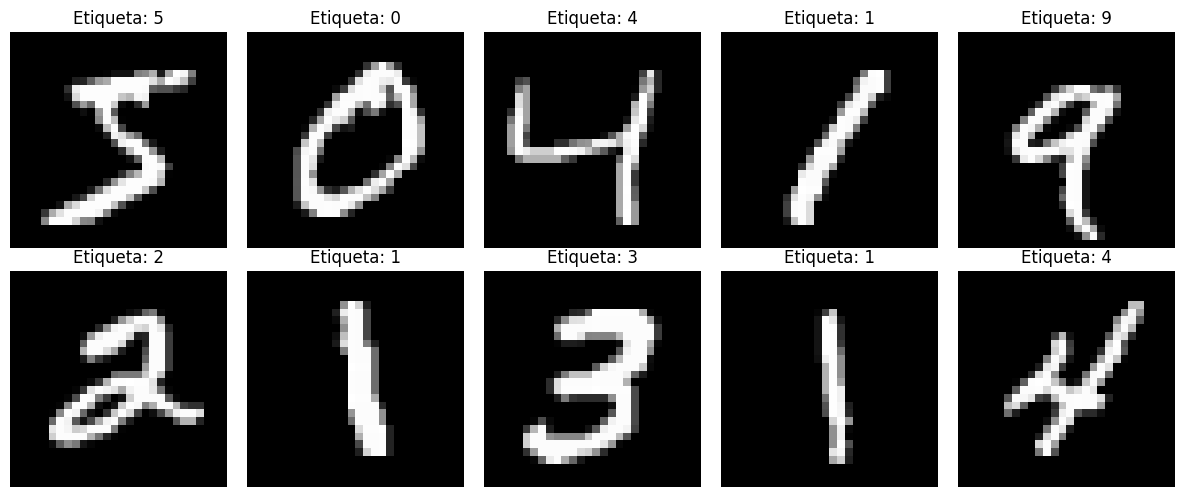

In [10]:
#dibujar las 10 primera imagenes que estan en xtrain

import matplotlib.pyplot as plt

# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(12, 5))

for i in range(10):
    # Crear una cuadrícula de 2 filas y 5 columnas
    plt.subplot(2, 5, i + 1)
    
    # Mostrar la imagen en escala de grises
    plt.imshow(xtrain[i], cmap='gray')
    
    # Colocar la etiqueta de ytrain como título
    plt.title(f"Etiqueta: {ytrain[i]}")
    
    # Ocultar los ejes para que se vea más limpio
    plt.axis('off')

# Ajustar el espacio entre imágenes
plt.tight_layout()
plt.show()


In [11]:
print(xtrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
# Normalización de los datos
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# Verificación de los valores
print(f"Valor máximo en xtrain: {xtrain.max()}")
print(f"Valor mínimo en xtrain: {xtrain.min()}")


Valor máximo en xtrain: 1.0
Valor mínimo en xtrain: 0.0


In [13]:
from tensorflow.keras.optimizers import Adam

# Declaración del optimizador con el learning rate estándar
optimizador = Adam(learning_rate=0.001)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

mimodelo = Sequential([
    # Definimos la entrada de 28x28 píxeles
    Input(shape=(28, 28)),
    
    # Aplanamos la matriz de 28x28 a un vector de 784 neuronas
    Flatten(),
    
    # Capas ocultas con activación ReLU (estándar para capas intermedias)
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    
    # Capa de salida con 10 unidades (una por cada dígito) y activación lineal
    Dense(10, activation='linear')
])

# Ver el resumen de la arquitectura
mimodelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Declaración de la función de pérdida
perdida = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x7d2cfffa0360>, kwargs={'from_logits': True, 'ignore_class': None, 'axis': -1})>


In [19]:
# Compilación del modelo
mimodelo.compile(
    optimizer=optimizador,
    loss=perdida,
    metrics=['accuracy']
)

print("Modelo compilado exitosamente.")


Modelo compilado exitosamente.


In [22]:
# Entrenamiento del modelo
historial = mimodelo.fit(
    xtrain, 
    ytrain, 
    epochs=6, 
    validation_data=(xtest, ytest) # Opcional: para ver el desempeño en tiempo real
)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9755 - val_loss: 0.1305
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0119 - val_accuracy: 0.9732 - val_loss: 0.1310
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9740 - val_loss: 0.1404
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9733 - val_loss: 0.1345
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0118 - val_accuracy: 0.9735 - val_loss: 0.1660
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 0.9681 - val_loss: 0.1688


In [23]:
mimodelo.evaluate(xtest, ytest, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9681 - loss: 0.1688


[0.16877728700637817, 0.9681000113487244]

In [24]:
mimodelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,056 (621.32 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,038 (414.21 KB)